In [1]:
# Import libraries

import pandas as pd
from glob import glob
import datetime
import calendar

import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import requests
import seaborn as sns

print(sns.__version__)

import matplotlib
from io import StringIO
import zipfile
import urllib
from __future__ import division, print_function

matplotlib.style.use('fivethirtyeight')
%matplotlib inline

0.9.0


In [4]:
# Get 2017 data from url and request it as json file
url = 'https://opendata.arcgis.com/datasets/8a2d7d329b854c02b0fb173d1fd660a0_0.geojson'
geojson = requests.get(url).json()
# Read the data as GeodataFrame in Geopandas
crs = {'init': 'epsg:26988'} # Coordinate reference system (CRS) for Detroit
gdf2017 = gpd.GeoDataFrame.from_features(geojson['features'], crs=crs)

In [5]:
geojson

{'type': 'FeatureCollection',
 'name': '2017_Crash_Locations',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'CRASHID': 9987073,
    'DATE_FULL': '03/20/2017',
    'YEAR': 2017,
    'MONTH': 3,
    'DAY': 20,
    'WEEKDAY': 2,
    'HOUR': 21,
    'JURIS': '1',
    'PROPDAMG': 1,
    'KCOUNT': 0,
    'ACOUNT': 0,
    'BCOUNT': 0,
    'CCOUNT': 0,
    'OCCUPANTS': 2,
    'UNITS': 2,
    'CRSHTYPEO': 5,
    'DEER': 0,
    'SCHOOLBUS': 0,
    'HITNRUN': 0,
    'WEATHER': 4,
    'LIGHTING': 4,
    'ROADCONDIT': 2,
    'ROADLANES': 3,
    'SPEEDLIMIT': 55,
    'ALCOHOL': 0,
    'DRUG': 0,
    'PEDESTRIAN': 0,
    'BICYCLE': 0,
    'MOTORCYCLE': 0,
    'TRAIN': 0,
    'DISTRACTED': 0,
    'MAINROAD': 'W I 94',
    'INTERROAD': 'CONCORD',
    'XCORD': -83.0293,
    'YCORD': 42.3839,
    'HWY_CLSS_C': 1,
    'ELDERLY': 0,
    'YOUNG': 0,
    'DIS_CTRL_I': 0,
    'REDLIGHTRU': 0,
    'FA

In [6]:
gdf2017.head()

,ACOUNT,ALCOHOL,BCOUNT,BICYCLE,CCOUNT,CNTNAME,COMMUNITY,CRASHID,CRSHTYPEO,DATE_FULL,...,TIME_FULL,TRAIN,UNITS,WEATHER,WEEKDAY,XCORD,YCORD,YEAR,YOUNG,geometry
0,0,0,0,0,0,Wayne,Detroit,9987073,5,03/20/2017,...,2120,0,2,4,2,-83.02930,42.38390,2017,0,POINT (-83.02929369632444 42.3839035411992)
1,0,0,0,0,0,Oakland,Rochester Hills,9987285,5,03/09/2017,...,1735,0,2,1,5,-83.13083,42.62410,2017,1,POINT (-83.13083182427903 42.6241091318271)
2,0,0,0,0,0,Wayne,Lincoln Park,9987059,8,03/20/2017,...,741,0,2,2,2,-83.18346,42.25464,2017,1,POINT (-83.18346099423164 42.2546493712391)
3,0,0,0,0,0,Wayne,Redford Twp,9987196,5,03/26/2017,...,2334,0,2,4,1,-83.27619,42.39159,2017,1,POINT (-83.276190079915 42.3915906670204)
4,0,0,0,0,0,Oakland,Royal Oak,9986911,5,03/23/2017,...,1530,0,2,1,5,-83.11546,42.47619,2017,0,POINT (-83.11545585743073 42.47619560610586)


In [7]:
gdf2017.shape

(145362, 52)

In [8]:
# Get 2015 data from url and request it as json file
url = 'https://opendata.arcgis.com/datasets/d7104c4af1134790b8c5c067079564a5_0.geojson'
geojson = requests.get(url).json()
# Read the data as GeodataFrame in Geopandas
crs = {'init': 'epsg:26988'} # Coordinate reference system (CRS) for Detroit
gdf2015 = gpd.GeoDataFrame.from_features(geojson['features'], crs=crs)


In [9]:
gdf2015.head()

,ACOUNT,ALCOHOL,BCOUNT,BICYCLE,CCOUNT,CNTNAME,COMMUNITY,CRASHID,CRSHTYPEO,DATE_FULL,...,TIME_FULL,TRAIN,UNITS,WEATHER,WEEKDAY,XCORD,YCORD,YEAR,YOUNG,geometry
0,0,0,0,0,0,Oakland,Rochester,9251363,8,04/15/2015,...,1702,0,2,1,4,-83.13400,42.68610,2015,0,POINT (-83.1339970274028 42.6861068185522)
1,0,0,0,0,0,Macomb,Macomb Twp,9354121,5,08/08/2015,...,1924,0,2,1,7,-82.94892,42.62766,2015,1,POINT (-82.9489140185498 42.6276717844896)
2,0,0,0,0,0,Wayne,Detroit,9354309,97,08/26/2015,...,2100,0,2,2,4,-83.00461,42.41675,2015,0,POINT (-83.004605399779 42.4167613399986)
3,0,0,0,0,0,St. Clair,Port Huron,9353825,5,08/09/2015,...,2140,0,2,1,1,-82.42474,42.96644,2015,0,POINT (-82.42473344887441 42.9664557427681)
4,0,0,0,0,0,Wayne,Allen Park,9156227,5,01/13/2015,...,1649,0,3,2,3,-83.21241,42.22797,2015,0,POINT (-83.21240997591519 42.2279751014261)


In [10]:
gdf2015.shape

(138617, 52)

In [11]:
# Get 2016 data from url and request it as json file
url = 'https://opendata.arcgis.com/datasets/2e0e6b2e1a944313a9766612746d27bf_0.geojson'
geojson = requests.get(url).json()
# Read the data as GeodataFrame in Geopandas
crs = {'init': 'epsg:26988'} # Coordinate reference system (CRS) for Detroit
gdf2016 = gpd.GeoDataFrame.from_features(geojson['features'], crs=crs)

In [12]:
gdf2016.head()

,ACOUNT,ALCOHOL,BCOUNT,BICYCLE,CCOUNT,CNTNAME,COMMUNITY,CRASHID,CRSHTYPEO,DATE_FULL,...,TIME_FULL,TRAIN,UNITS,WEATHER,WEEKDAY,XCORD,YCORD,YEAR,YOUNG,geometry
0,0,0,0,0,0,Wayne,Detroit,9609459,1,01/01/2016,...,2200,0,1,2,6,-83.17902,42.38335,2016,0,POINT (-83.1790215659116 42.38335385174703)
1,0,0,0,0,0,Oakland,Novi,9609064,4,01/11/2016,...,922,0,2,2,2,-83.51557,42.48976,2016,0,POINT (-83.51556449413584 42.48975288977832)
2,0,0,0,0,1,Macomb,Sterling Heights,9620778,4,02/04/2016,...,1110,0,3,2,5,-83.06930,42.55042,2016,0,POINT (-83.06928908588542 42.5504310195112)
3,0,0,0,0,0,Oakland,Auburn Hills,9610003,5,01/12/2016,...,1645,0,3,2,3,-83.22018,42.65196,2016,1,POINT (-83.22017331092371 42.6519669057648)
4,0,0,0,0,0,Macomb,Macomb Twp,9612438,8,01/29/2016,...,1922,0,2,1,6,-82.94057,42.67193,2016,0,POINT (-82.94056118659405 42.6719374932083)


In [13]:
gdf2016.shape

(145428, 52)

In [14]:
# Get 2014 data from url and request it as json file
url = 'https://opendata.arcgis.com/datasets/9d86980ae7ca41278b147b335bc73560_0.geojson'
geojson = requests.get(url).json()
# Read the data as GeodataFrame in Geopandas
crs = {'init': 'epsg:26988'} # Coordinate reference system (CRS) for Detroit
gdf2014 = gpd.GeoDataFrame.from_features(geojson['features'], crs=crs)

KeyError: 'features'

In [ ]:
gdf2014.head()

In [ ]:
gdf2014.shape

In [16]:
# Get 2013 data from url and request it as json file
url = 'https://opendata.arcgis.com/datasets/b1d5fcffaede4a078fd5480c8f5b580a_0.geojson'
geojson = requests.get(url).json()
# Read the data as GeodataFrame in Geopandas
crs = {'init': 'epsg:26988'} # Coordinate reference system (CRS) for Detroit
gdf2013 = gpd.GeoDataFrame.from_features(geojson['features'], crs=crs)

KeyError: 'features'

In [17]:
gdf2013.head()

NameError: name 'gdf2013' is not defined

In [18]:
gdf2013.shape

NameError: name 'gdf2013' is not defined

In [19]:
#gdf2013.columns

In [20]:
#gdf2014.columns

In [21]:
#gdf2015.columns

In [22]:
#gdf2016.columns

In [23]:
#gdf2017.columns

In [24]:
gdf = pd.concat([gdf2017, gdf2016,gdf2015,gdf2014,gdf2013], ignore_index=True)

NameError: name 'gdf2014' is not defined

In [70]:
gdf.columns

Index(['ACOUNT', 'ALCOHOL', 'BCOUNT', 'BICYCLE', 'CCOUNT', 'CNTNAME',
       'COMMUNITY', 'CRASHID', 'CRSHTYPEO', 'DATE_FULL', 'DAY', 'DEER',
       'DISTRACTED', 'DIS_CTRL_I', 'DRUG', 'ELDERLY', 'FALINKID', 'HIGH_SEVER',
       'HITNRUN', 'HOUR', 'HWY_CLSS_C', 'INTERROAD', 'INTR_INVL_', 'JURIS',
       'KCOUNT', 'LANEDEPART', 'LIGHTING', 'MAINROAD', 'MONTH', 'MOTORCYCLE',
       'MP', 'OBJECTID', 'OCCUPANTS', 'PEDESTRIAN', 'PR', 'PROPDAMG',
       'REDLIGHTRU', 'ROADCONDIT', 'ROADLANES', 'SCHOOLBUS', 'SEMMCD',
       'SPEEDLIMIT', 'TIME_FULL', 'TRAIN', 'UNITS', 'WEATHER', 'WEEKDAY',
       'XCORD', 'YCORD', 'YEAR', 'YOUNG', 'geometry'],
      dtype='object')

In [71]:
gdf.shape

(693973, 52)

In [72]:
gdf.rename(columns={'XCORD': 'LONGITUDE', 'YCORD': 'LATITUDE'}, inplace=True)

In [73]:
gdf.columns

Index(['ACOUNT', 'ALCOHOL', 'BCOUNT', 'BICYCLE', 'CCOUNT', 'CNTNAME',
       'COMMUNITY', 'CRASHID', 'CRSHTYPEO', 'DATE_FULL', 'DAY', 'DEER',
       'DISTRACTED', 'DIS_CTRL_I', 'DRUG', 'ELDERLY', 'FALINKID', 'HIGH_SEVER',
       'HITNRUN', 'HOUR', 'HWY_CLSS_C', 'INTERROAD', 'INTR_INVL_', 'JURIS',
       'KCOUNT', 'LANEDEPART', 'LIGHTING', 'MAINROAD', 'MONTH', 'MOTORCYCLE',
       'MP', 'OBJECTID', 'OCCUPANTS', 'PEDESTRIAN', 'PR', 'PROPDAMG',
       'REDLIGHTRU', 'ROADCONDIT', 'ROADLANES', 'SCHOOLBUS', 'SEMMCD',
       'SPEEDLIMIT', 'TIME_FULL', 'TRAIN', 'UNITS', 'WEATHER', 'WEEKDAY',
       'LONGITUDE', 'LATITUDE', 'YEAR', 'YOUNG', 'geometry'],
      dtype='object')

In [74]:
gdf = gdf.rename(str.lower, axis='columns')

In [75]:
gdf.columns

Index(['acount', 'alcohol', 'bcount', 'bicycle', 'ccount', 'cntname',
       'community', 'crashid', 'crshtypeo', 'date_full', 'day', 'deer',
       'distracted', 'dis_ctrl_i', 'drug', 'elderly', 'falinkid', 'high_sever',
       'hitnrun', 'hour', 'hwy_clss_c', 'interroad', 'intr_invl_', 'juris',
       'kcount', 'lanedepart', 'lighting', 'mainroad', 'month', 'motorcycle',
       'mp', 'objectid', 'occupants', 'pedestrian', 'pr', 'propdamg',
       'redlightru', 'roadcondit', 'roadlanes', 'schoolbus', 'semmcd',
       'speedlimit', 'time_full', 'train', 'units', 'weather', 'weekday',
       'longitude', 'latitude', 'year', 'young', 'geometry'],
      dtype='object')

In [76]:
def str_join(df, sep, *cols):
    from functools import reduce
    return reduce(lambda x, y: x.astype(str).str.cat(y.astype(str), sep=sep), 
                    [df[col] for col in cols])

In [77]:
gdf.head(3)

,acount,alcohol,bcount,bicycle,ccount,cntname,community,crashid,crshtypeo,date_full,...,time_full,train,units,weather,weekday,longitude,latitude,year,young,geometry
0,0,0,0,0,0,Macomb,Harrison Twp,1119424,98,08/21/2017,...,1200,0,2,1,2,-82.82389,42.58496,2017,0,POINT (-82.82389178568815 42.58497261400901)
1,0,0,0,0,0,Wayne,Romulus,1198482,5,11/17/2017,...,1745,0,3,1,6,-83.38575,42.23174,2017,0,POINT (-83.38575405575686 42.23174849348351)
2,1,0,0,0,0,Oakland,Holly Twp,1197965,97,11/03/2017,...,1320,0,3,1,6,-83.59132,42.86608,2017,0,POINT (-83.59131542274598 42.86608430122132)


In [78]:
gdf.date_full[0]

'08/21/2017'

In [79]:
gdf.dtypes

acount          int64
alcohol         int64
bcount          int64
bicycle         int64
ccount          int64
cntname        object
community      object
crashid         int64
crshtypeo       int64
date_full      object
day             int64
deer            int64
distracted      int64
dis_ctrl_i      int64
drug            int64
elderly         int64
falinkid        int64
high_sever      int64
hitnrun         int64
hour            int64
hwy_clss_c      int64
interroad      object
intr_invl_      int64
juris          object
kcount          int64
lanedepart      int64
lighting        int64
mainroad       object
month           int64
motorcycle      int64
mp            float64
objectid        int64
occupants       int64
pedestrian      int64
pr              int64
propdamg        int64
redlightru      int64
roadcondit      int64
roadlanes       int64
schoolbus       int64
semmcd          int64
speedlimit      int64
time_full       int64
train           int64
units           int64
weather   

In [80]:
#change data type
gdf['datefull'] =  gdf[["date_full"]].apply(pd.to_datetime)

In [81]:
#set index
gdf = gdf.set_index('datefull')
gdf.head(3)

,acount,alcohol,bcount,bicycle,ccount,cntname,community,crashid,crshtypeo,date_full,...,time_full,train,units,weather,weekday,longitude,latitude,year,young,geometry
datefull,,,,,,,,,,,,,,,,,,,,,
2017-08-21,0,0,0,0,0,Macomb,Harrison Twp,1119424,98,08/21/2017,...,1200,0,2,1,2,-82.82389,42.58496,2017,0,POINT (-82.82389178568815 42.58497261400901)
2017-11-17,0,0,0,0,0,Wayne,Romulus,1198482,5,11/17/2017,...,1745,0,3,1,6,-83.38575,42.23174,2017,0,POINT (-83.38575405575686 42.23174849348351)
2017-11-03,1,0,0,0,0,Oakland,Holly Twp,1197965,97,11/03/2017,...,1320,0,3,1,6,-83.59132,42.86608,2017,0,POINT (-83.59131542274598 42.86608430122132)


In [82]:
gdf.index

DatetimeIndex(['2017-08-21', '2017-11-17', '2017-11-03', '2017-12-16',
               '2017-11-02', '2017-03-14', '2017-03-23', '2017-03-19',
               '2017-03-22', '2017-04-07',
               ...
               '2013-07-09', '2013-07-06', '2013-07-03', '2013-12-31',
               '2013-05-17', '2013-12-26', '2013-09-29', '2013-06-13',
               '2013-05-11', '2013-05-17'],
              dtype='datetime64[ns]', name='datefull', length=693973, freq=None)

In [83]:
gdf['Weekday Name'] = gdf.index.weekday_name

# Display a random sampling of 5 rows
gdf.sample(5, random_state=0)

,acount,alcohol,bcount,bicycle,ccount,cntname,community,crashid,crshtypeo,date_full,...,train,units,weather,weekday,longitude,latitude,year,young,geometry,Weekday Name
datefull,,,,,,,,,,,,,,,,,,,,,
2014-09-26,0,0,0,0,0,Wayne,Van Buren Twp,9062577,4,09/26/2014,...,0,2,1,6,-83.48507,42.22699,2014,1,POINT (-83.48506986668282 42.2269946603467),Friday
2016-04-16,0,0,0,0,0,Wayne,Southgate,9677091,1,04/16/2016,...,0,1,1,7,-83.19328,42.19190,2016,1,POINT (-83.19327167421422 42.1919091220338),Saturday
2014-11-11,0,0,0,0,0,Wayne,Taylor,9095640,8,11/11/2014,...,0,2,1,3,-83.24031,42.19828,2014,1,POINT (-83.24030670251604 42.19828898972305),Tuesday
2016-09-03,0,0,0,0,0,Wayne,Detroit,9785649,5,09/03/2016,...,0,2,1,7,-83.26630,42.40024,2016,0,POINT (-83.2662993438709 42.40024763251615),Saturday
2013-07-02,0,0,0,0,0,Washtenaw,Ypsilanti Twp,8680351,5,07/02/2013,...,0,2,1,3,-83.61777,42.22433,2013,1,POINT (-83.61777064796317 42.22433304112428),Tuesday


In [84]:
gdf['intersection'] = str_join(gdf, ' @ ', 'mainroad', 'interroad')

In [85]:
#decode Weather codes
gdf['Whtr'] = 'Clear'
gdf['Whtr'][gdf['weather'] == 2] = 'Cloudy'
gdf['Whtr'][gdf['weather'] == 3] = 'Fog'
gdf['Whtr'][gdf['weather'] == 4] = 'Rain'
gdf['Whtr'][gdf['weather'] == 5] = 'Snow'
gdf['Whtr'][gdf['weather'] == 6] = 'Severe Crosswinds'
gdf['Whtr'][gdf['weather'] == 7] = 'Sleet or Hail'
gdf['Whtr'][gdf['weather'] == 8] = 'Blowing Snow'
gdf['Whtr'][gdf['weather'] == 9] = 'Blowing Sand, Soil, Dirt'
gdf['Whtr'][gdf['weather'] == 10] = 'Smoke'
gdf['Whtr'][gdf['weather'] == 98] = 'Unknown'

C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [86]:
#decode Crahstype codes
gdf['crashtype'] = 'Single Motor Vehicle'
gdf['crashtype'][gdf['crshtypeo'] == 2] = 'Head On'
gdf['crashtype'][gdf['crshtypeo'] == 3] = 'Head On-Left Turn'
gdf['crashtype'][gdf['crshtypeo'] == 4] = 'Angle'
gdf['crashtype'][gdf['crshtypeo'] == 5] = 'Rear End'
gdf['crashtype'][gdf['crshtypeo'] == 6] = 'Rear End-Left Turn'
gdf['crashtype'][gdf['crshtypeo'] == 7] = 'Rear End-Right Turn'
gdf['crashtype'][gdf['crshtypeo'] == 8] = 'Sideswipe-Same'
gdf['crashtype'][gdf['crshtypeo'] == 9] = 'Sideswipe-Opposite'
gdf['crashtype'][gdf['crshtypeo'] == 10] = 'backing'
gdf['crashtype'][gdf['crshtypeo'] == 97] = 'Other'
gdf['crashtype'][gdf['crshtypeo'] == 98] = 'Null'

C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [87]:
gdf.head(2)

,acount,alcohol,bcount,bicycle,ccount,cntname,community,crashid,crshtypeo,date_full,...,weekday,longitude,latitude,year,young,geometry,Weekday Name,intersection,Whtr,crashtype
datefull,,,,,,,,,,,,,,,,,,,,,
2017-08-21,0,0,0,0,0,Macomb,Harrison Twp,1119424,98,08/21/2017,...,2,-82.82389,42.58496,2017,0,POINT (-82.82389178568815 42.58497261400901),Monday,CANTERBURY @ ASHLAND,Clear,Null
2017-11-17,0,0,0,0,0,Wayne,Romulus,1198482,5,11/17/2017,...,6,-83.38575,42.23174,2017,0,POINT (-83.38575405575686 42.23174849348351),Friday,WAYNE @ MICHELLE,Clear,Rear End


In [88]:
#decode Lighting conditions

gdf['light_condition'] = 'Daylight'
gdf['light_condition'][gdf['lighting'] == 2] = 'Dawn'
gdf['light_condition'][gdf['lighting'] == 3] = 'Dusk'
gdf['light_condition'][gdf['lighting'] == 4] = 'Dark-lighted'
gdf['light_condition'][gdf['lighting'] == 5] = 'Dark-Unlighted'

C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\smehta9\AppData\Lo

In [89]:
gdf.head(2)

,acount,alcohol,bcount,bicycle,ccount,cntname,community,crashid,crshtypeo,date_full,...,longitude,latitude,year,young,geometry,Weekday Name,intersection,Whtr,crashtype,light_condition
datefull,,,,,,,,,,,,,,,,,,,,,
2017-08-21,0,0,0,0,0,Macomb,Harrison Twp,1119424,98,08/21/2017,...,-82.82389,42.58496,2017,0,POINT (-82.82389178568815 42.58497261400901),Monday,CANTERBURY @ ASHLAND,Clear,Null,Daylight
2017-11-17,0,0,0,0,0,Wayne,Romulus,1198482,5,11/17/2017,...,-83.38575,42.23174,2017,0,POINT (-83.38575405575686 42.23174849348351),Friday,WAYNE @ MICHELLE,Clear,Rear End,Dark-lighted


In [90]:
#decode Road Conditions

gdf['road_condition'] = 'Dry'
gdf['road_condition'][gdf['roadcondit'] == 2] = 'Wet'
gdf['road_condition'][gdf['roadcondit'] == 3] = 'Ice'
gdf['road_condition'][gdf['roadcondit'] == 4] = 'Snow'
gdf['road_condition'][gdf['roadcondit'] == 5] = 'Mud, Dirt, Gravel'
gdf['road_condition'][gdf['roadcondit'] == 6] = 'Slush'
gdf['road_condition'][gdf['roadcondit'] == 7] = 'Debris'
gdf['road_condition'][gdf['roadcondit'] == 8] = 'Water (Standing/Moving)'
gdf['road_condition'][gdf['roadcondit'] == 9] = 'Sand'
gdf['road_condition'][gdf['roadcondit'] == 10] = 'Oily'
gdf['road_condition'][gdf['roadcondit'] == 97] = 'Other'
gdf['road_condition'][gdf['roadcondit'] == 98] = 'Unknown' 
gdf['road_condition'][gdf['roadcondit'] == 0] = 'Not entered'

C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\smehta9\AppData\Lo

In [91]:
#decode injury severity

gdf['injury_serverity'] = 'Fatal Injury (K)'
gdf['injury_serverity'][gdf['high_sever'] == 2] = 'Suspected Serious Injury (A)'
gdf['injury_serverity'][gdf['high_sever'] == 3] = 'Suspected Minor Injury (B)'
gdf['injury_serverity'][gdf['high_sever'] == 4] = 'Possible Injury (C)'
gdf['injury_serverity'][gdf['high_sever'] == 5] = ' No Injury (O)'

C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\smehta9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\smehta9\AppData\Lo

In [92]:
gdf.head(2)

,acount,alcohol,bcount,bicycle,ccount,cntname,community,crashid,crshtypeo,date_full,...,year,young,geometry,Weekday Name,intersection,Whtr,crashtype,light_condition,road_condition,injury_serverity
datefull,,,,,,,,,,,,,,,,,,,,,
2017-08-21,0,0,0,0,0,Macomb,Harrison Twp,1119424,98,08/21/2017,...,2017,0,POINT (-82.82389178568815 42.58497261400901),Monday,CANTERBURY @ ASHLAND,Clear,Null,Daylight,Dry,No Injury (O)
2017-11-17,0,0,0,0,0,Wayne,Romulus,1198482,5,11/17/2017,...,2017,0,POINT (-83.38575405575686 42.23174849348351),Friday,WAYNE @ MICHELLE,Clear,Rear End,Dark-lighted,Dry,No Injury (O)


In [93]:
gdf.shape

(693973, 59)

In [94]:
gdf.columns

Index(['acount', 'alcohol', 'bcount', 'bicycle', 'ccount', 'cntname',
       'community', 'crashid', 'crshtypeo', 'date_full', 'day', 'deer',
       'distracted', 'dis_ctrl_i', 'drug', 'elderly', 'falinkid', 'high_sever',
       'hitnrun', 'hour', 'hwy_clss_c', 'interroad', 'intr_invl_', 'juris',
       'kcount', 'lanedepart', 'lighting', 'mainroad', 'month', 'motorcycle',
       'mp', 'objectid', 'occupants', 'pedestrian', 'pr', 'propdamg',
       'redlightru', 'roadcondit', 'roadlanes', 'schoolbus', 'semmcd',
       'speedlimit', 'time_full', 'train', 'units', 'weather', 'weekday',
       'longitude', 'latitude', 'year', 'young', 'geometry', 'Weekday Name',
       'intersection', 'Whtr', 'crashtype', 'light_condition',
       'road_condition', 'injury_serverity'],
      dtype='object')

In [95]:
start_year = gdf.year.min()
end_year = gdf.year.max()

In [96]:
gdf.dtypes

acount                int64
alcohol               int64
bcount                int64
bicycle               int64
ccount                int64
cntname              object
community            object
crashid               int64
crshtypeo             int64
date_full            object
day                   int64
deer                  int64
distracted            int64
dis_ctrl_i            int64
drug                  int64
elderly               int64
falinkid              int64
high_sever            int64
hitnrun               int64
hour                  int64
hwy_clss_c            int64
interroad            object
intr_invl_            int64
juris                object
kcount                int64
lanedepart            int64
lighting              int64
mainroad             object
month                 int64
motorcycle            int64
mp                  float64
objectid              int64
occupants             int64
pedestrian            int64
pr                    int64
propdamg            

In [97]:
gdf.Whtr.head(5)

datefull
2017-08-21     Clear
2017-11-17     Clear
2017-11-03     Clear
2017-12-16    Cloudy
2017-11-02      Rain
Name: Whtr, dtype: object

In [98]:
gdf.road_condition.head(5)

datefull
2017-08-21                  Dry
2017-11-17                  Dry
2017-11-03                  Dry
2017-12-16                  Wet
2017-11-02    Mud, Dirt, Gravel
Name: road_condition, dtype: object

In [99]:
gdf.crashtype.head(5)

datefull
2017-08-21        Null
2017-11-17    Rear End
2017-11-03       Other
2017-12-16    Rear End
2017-11-02    Rear End
Name: crashtype, dtype: object

In [100]:
gdf.light_condition.head(5)

datefull
2017-08-21          Daylight
2017-11-17      Dark-lighted
2017-11-03          Daylight
2017-12-16          Daylight
2017-11-02    Dark-Unlighted
Name: light_condition, dtype: object

In [101]:
start_year

2013

In [102]:
end_year

2017

In [103]:
gdf.intersection

<bound method GeoPandasBase.intersection of             acount  alcohol  bcount  bicycle  ccount     cntname  \
datefull                                                           
2017-08-21       0        0       0        0       0      Macomb   
2017-11-17       0        0       0        0       0       Wayne   
2017-11-03       1        0       0        0       0     Oakland   
2017-12-16       0        0       0        0       0     Oakland   
2017-11-02       0        0       0        0       0     Oakland   
2017-03-14       0        0       0        0       0     Oakland   
2017-03-23       0        0       0        0       0     Oakland   
2017-03-19       0        0       0        0       0       Wayne   
2017-03-22       0        0       0        0       0       Wayne   
2017-04-07       0        0       0        0       0      Macomb   
2017-02-01       0        0       0        0       1       Wayne   
2017-12-28       0        0       0        0       0     Oakland   
2017

In [104]:
gdf = gdf.drop(columns=['falinkid', 'objectid','pr','mp','juris','semmcd','date_full','weather','crshtypeo', 'lighting','roadcondit','interroad','mainroad','high_sever'])

In [105]:
gdf.columns

Index(['acount', 'alcohol', 'bcount', 'bicycle', 'ccount', 'cntname',
       'community', 'crashid', 'day', 'deer', 'distracted', 'dis_ctrl_i',
       'drug', 'elderly', 'hitnrun', 'hour', 'hwy_clss_c', 'intr_invl_',
       'kcount', 'lanedepart', 'month', 'motorcycle', 'occupants',
       'pedestrian', 'propdamg', 'redlightru', 'roadlanes', 'schoolbus',
       'speedlimit', 'time_full', 'train', 'units', 'weekday', 'longitude',
       'latitude', 'year', 'young', 'geometry', 'Weekday Name', 'intersection',
       'Whtr', 'crashtype', 'light_condition', 'road_condition',
       'injury_serverity'],
      dtype='object')

In [106]:
#metadata https://www.arcgis.com/sharing/rest/content/items/8a2d7d329b854c02b0fb173d1fd660a0/info/metadata/metadata.xml?format=default&output=html

serious = gdf['acount'].sum()
minor = gdf['bcount'].sum()
possible = gdf['ccount'].sum()

In [107]:
print("The total serious crash accidents since the year {}, to {} is {}.".format(start_year, end_year,serious))

The total serious crash accidents since the year 2013, to 2017 is 10370.


In [108]:
print("While the total number of minor injuries and posible injuries in car accidents reach {}, {} respectively".format(minor,possible))

While the total number of minor injuries and posible injuries in car accidents reach 44496, 138163 respectively


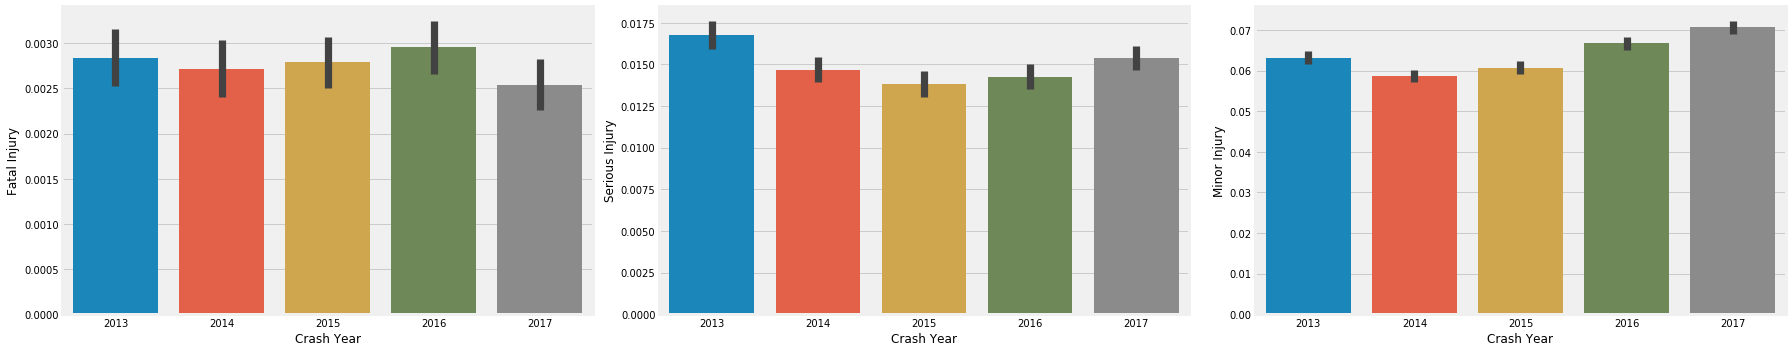

In [109]:
fig, ax = plt.subplots(1, 3, figsize = (25, 5));

sns.barplot(x="year", y="kcount",  data=gdf, ax=ax[0]);
sns.barplot(x="year", y="acount",  data=gdf, ax=ax[1]);
sns.barplot(x="year", y="bcount",  data=gdf, ax=ax[2]);

[ax[i].set_xlabel('Crash Year') for i in range(3)]
[ax[0].set_ylabel('Fatal Injury')]
[ax[1].set_ylabel('Serious Injury')]
[ax[2].set_ylabel('Minor Injury')]
plt.tight_layout()


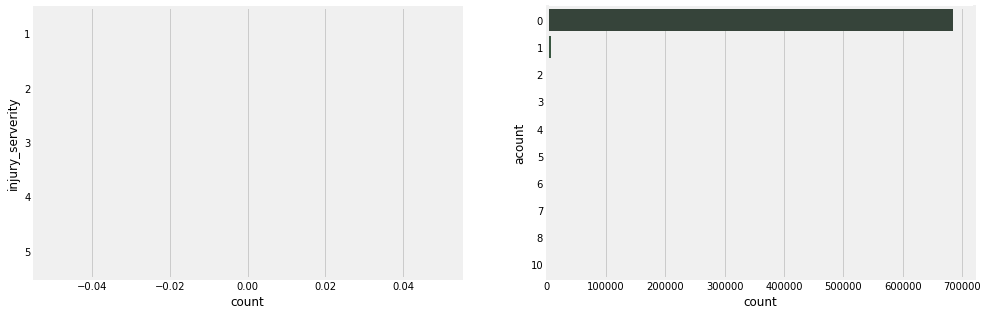

In [110]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5));
sns.countplot(y="injury_serverity",data=gdf, palette="Greens_d", order='12345',ax = ax[0]);
sns.countplot(y="acount",data=gdf, palette="Greens_d", ax=ax[1]);

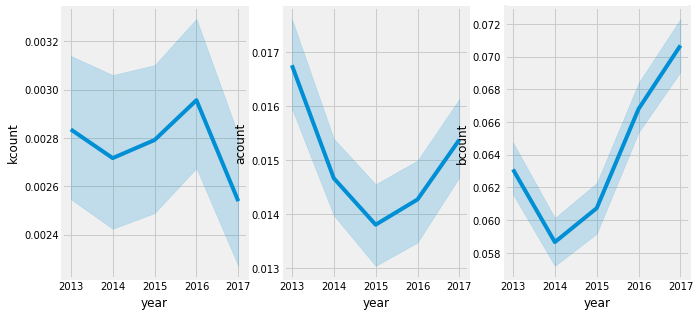

In [111]:
fig, ax = plt.subplots(1, 3, figsize = (10,5));
sns.lineplot(x="year", y="kcount",data=gdf, ax=ax[0]);
sns.lineplot(x="year", y="acount",data=gdf, ax=ax[1]);
sns.lineplot(x="year", y="bcount",data=gdf, ax=ax[2]);
#sns.lineplot(x="year", y="kcount",data=gdf, ax=ax[3]);

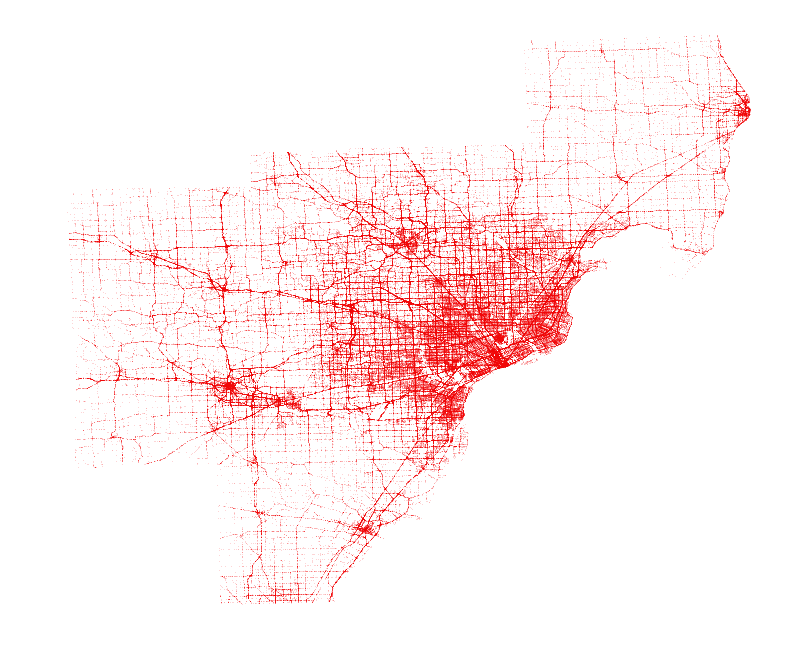

In [112]:
gdf.plot(markersize=0.01, edgecolor='red',figsize=(12,12));
plt.axis('off');

In [113]:
#### NEW CODE ADDED
####################################################

In [114]:
from folium.plugins import HeatMap
import folium                    
import folium.plugins as plugins
from folium.plugins import HeatMapWithTime

In [115]:
def generateBaseMap(default_location=[42.331429,-83.045753], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [116]:
base_map = generateBaseMap()
base_map

In [117]:
gdf.columns

Index(['acount', 'alcohol', 'bcount', 'bicycle', 'ccount', 'cntname',
       'community', 'crashid', 'day', 'deer', 'distracted', 'dis_ctrl_i',
       'drug', 'elderly', 'hitnrun', 'hour', 'hwy_clss_c', 'intr_invl_',
       'kcount', 'lanedepart', 'month', 'motorcycle', 'occupants',
       'pedestrian', 'propdamg', 'redlightru', 'roadlanes', 'schoolbus',
       'speedlimit', 'time_full', 'train', 'units', 'weekday', 'longitude',
       'latitude', 'year', 'young', 'geometry', 'Weekday Name', 'intersection',
       'Whtr', 'crashtype', 'light_condition', 'road_condition',
       'injury_serverity'],
      dtype='object')

In [118]:
m = HeatMap(data=gdf[['latitude', 'longitude', 'bcount']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(), radius=7, max_zoom=10).add_to(base_map)
m.save(r'C:\Mobility Research\Corktown\SEMCOG - Crash Data Analysis\test\heatmap_bcount.html')


In [119]:
m = HeatMap(data=gdf[['latitude', 'longitude', 'kcount']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(), radius=7, max_zoom=10).add_to(base_map)
m.save(r'C:\Mobility Research\Corktown\SEMCOG - Crash Data Analysis\test\heatmap_fatal.html')

In [120]:
total_traffic_fatalities = gdf.kcount.sum()
print("Total Traffic Fatalities: ", total_traffic_fatalities)

Total Traffic Fatalities:  1920


In [121]:
total_traffic_accidents = gdf.crashid.count()
print("Total Traffic Accidents: ", total_traffic_accidents)

Total Traffic Accidents:  693973


In [122]:
Fatality_Rate = total_traffic_fatalities/total_traffic_accidents
Fatality_Rate

0.0027666782425252857

In [123]:
gdf.head(2)

,acount,alcohol,bcount,bicycle,ccount,cntname,community,crashid,day,deer,...,year,young,geometry,Weekday Name,intersection,Whtr,crashtype,light_condition,road_condition,injury_serverity
datefull,,,,,,,,,,,,,,,,,,,,,
2017-08-21,0,0,0,0,0,Macomb,Harrison Twp,1119424,21,0,...,2017,0,POINT (-82.82389178568815 42.58497261400901),Monday,CANTERBURY @ ASHLAND,Clear,Null,Daylight,Dry,No Injury (O)
2017-11-17,0,0,0,0,0,Wayne,Romulus,1198482,17,0,...,2017,0,POINT (-83.38575405575686 42.23174849348351),Friday,WAYNE @ MICHELLE,Clear,Rear End,Dark-lighted,Dry,No Injury (O)


In [124]:
#gdf['kill_rate'] = (gdf['kcount'].value_counts()/gdf.crashid.count())*100

In [125]:
gdf.columns

Index(['acount', 'alcohol', 'bcount', 'bicycle', 'ccount', 'cntname',
       'community', 'crashid', 'day', 'deer', 'distracted', 'dis_ctrl_i',
       'drug', 'elderly', 'hitnrun', 'hour', 'hwy_clss_c', 'intr_invl_',
       'kcount', 'lanedepart', 'month', 'motorcycle', 'occupants',
       'pedestrian', 'propdamg', 'redlightru', 'roadlanes', 'schoolbus',
       'speedlimit', 'time_full', 'train', 'units', 'weekday', 'longitude',
       'latitude', 'year', 'young', 'geometry', 'Weekday Name', 'intersection',
       'Whtr', 'crashtype', 'light_condition', 'road_condition',
       'injury_serverity'],
      dtype='object')

In [126]:
CrashesByWeekDayHr = gdf.groupby(['Weekday Name','hour'],as_index=False).agg({'crashid':"count"})

In [127]:
CrashesByWeekDayHr.head(24)

,Weekday Name,hour,crashid
0,Friday,0,1389
1,Friday,1,1129
2,Friday,2,1091
3,Friday,3,777
4,Friday,4,743
5,Friday,5,1290
6,Friday,6,2804
7,Friday,7,5930
8,Friday,8,5845
9,Friday,9,4449


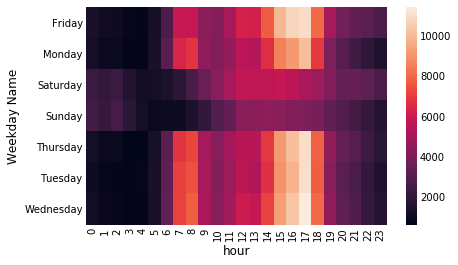

In [128]:
df_crash = CrashesByWeekDayHr.pivot('Weekday Name','hour', 'crashid')
htmap = sns.heatmap(df_crash)

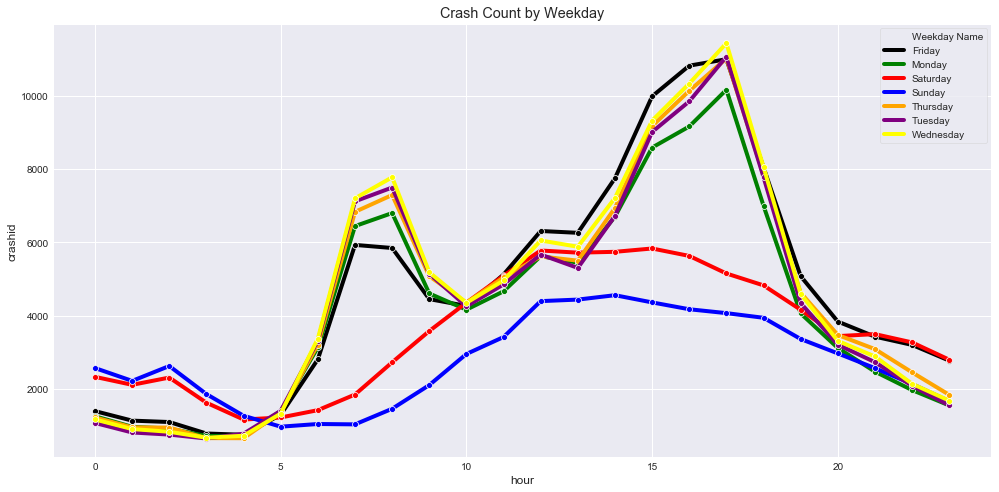

In [129]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
plt.title("Crash Count by Weekday")
ax = sns.lineplot(data=CrashesByWeekDayHr, x='hour', y='crashid', hue='Weekday Name',marker="o",palette=["black","green","red","blue","orange","purple","yellow"])


In [130]:
# Get crash count by weather
WeatherDF = gdf.groupby(['Whtr'],as_index=False).agg({'crashid':"count"}).sort_values(by=['crashid'],ascending=False)


In [131]:
WeatherDF

,Whtr,crashid
2,Clear,421487
3,Cloudy,142843
5,Rain,62910
9,Snow,47849
10,Unknown,11088
4,Fog,2890
7,Sleet or Hail,2416
1,Blowing Snow,1234
6,Severe Crosswinds,1210
0,"Blowing Sand, Soil, Dirt",28


In [132]:
WeatherDFTop5 = WeatherDF.head(5)

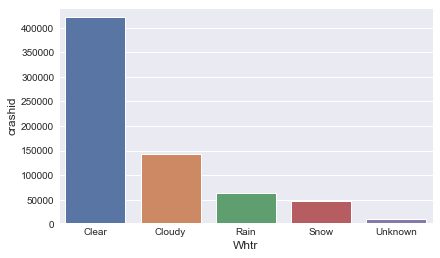

In [133]:
sns.distplot(WeatherDFTop5.crashid, kde=False, rug=True);

sns.set(style="whitegrid")
#trips = sns.load_dataset("RoutesDFTop5")
ax = sns.barplot(x="Whtr", y="crashid",data=WeatherDFTop5)

In [134]:
# Get crash count by Intersection
IntersectionDF = gdf.groupby(['intersection'],as_index=False).agg({'crashid':"count"}).sort_values(by=['crashid'],ascending=False)

In [135]:
#Top 20 crash intersections
IntersectionDF.head(20)

,intersection,crashid
43590,FORD @ LILLEY,588
43535,FORD @ HAGGERTY,542
53051,HALL @ ROMEO PLANK,536
52961,HALL @ GARFIELD,506
53059,HALL @ SCHOENHERR,493
50167,GRATIOT @ MASONIC,492
87302,MOUND @ 12 MILE,488
1403,11 MILE @ VAN DYKE,464
123335,TELEGRAPH @ 12 MILE,463
61493,I-75 @ 12 MILE,438


In [136]:
InjurtyType = gdf.groupby(['injury_serverity'],as_index=False).agg({'crashid':"count"})

total_traffic_accidents

693973

In [137]:
InjurtyType

,injury_serverity,crashid
0,No Injury (O),551408
1,Fatal Injury (K),1787
2,Possible Injury (C),96555
3,Suspected Minor Injury (B),35603
4,Suspected Serious Injury (A),8620


In [144]:
CrashesByYr = gdf.groupby(['year'],as_index=False).agg({'crashid':"count"})
CrashesByYr

,year,crashid
0,2013,128017
1,2014,136549
2,2015,138617
3,2016,145428
4,2017,145362


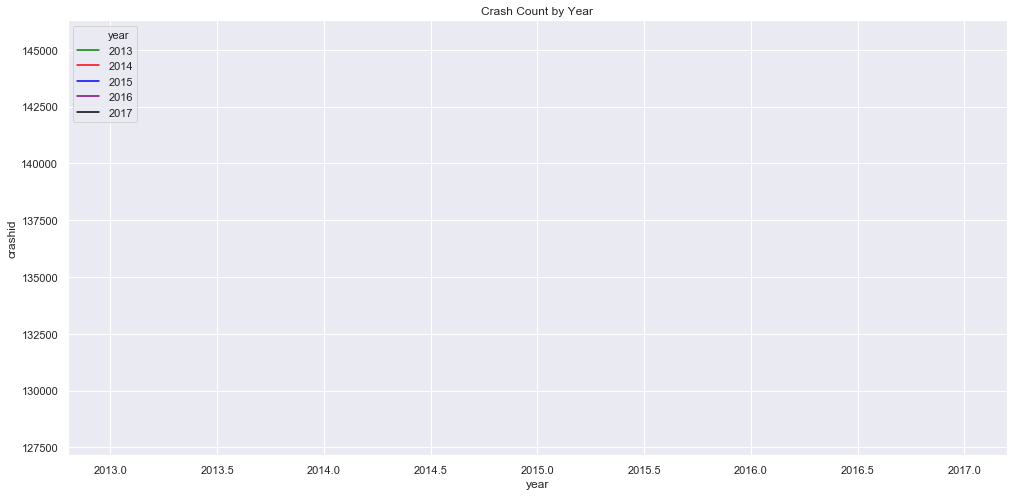

In [146]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
plt.title("Crash Count by Year")
ax = sns.lineplot(data=CrashesByYr, x='year', y='crashid', hue='year',marker="o",palette=["green","red","blue","purple","black"])


In [155]:
from matplotlib.ticker import MaxNLocator

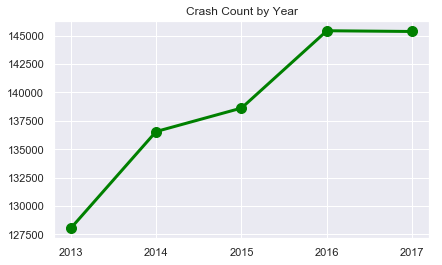

In [173]:
bins= [2013,2014,2015,2016,2017]
plt.plot( 'year', 'crashid', data=CrashesByYr, color='green',linewidth=3,marker='o',markersize=10)
#plt.axis([2013, 2017, 125000, 150000])
plt.xticks(bins)
plt.title("Crash Count by Year")
plt.show()

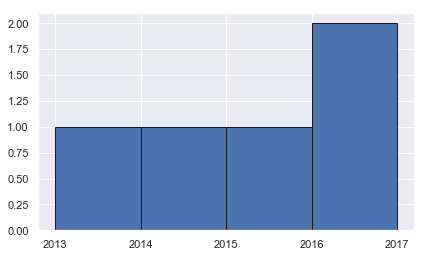